## Scenario
You are a Data Analyst at **Northwind Traders**, an international gourmet food distributor. Management is looking to you for insights to make strategic decisions in several aspects of the business. The projects focus on:

* Evaluating employee performance to boost productivity,
* Understanding product sales and category performance to optimize inventory and marketing strategies,
* Analyzing sales growth to identify trends, monitor company progress, and make more accurate forecasts,
* And evaluating customer purchase behavior to target high-value customers with promotional incentives.

Using the PostgreSQL window functions on the Northwind database, you will provide these essential insights to management, contributing significantly to the company's strategic decisions.

This project focuses on the rich [Northwind database](https://github.com/pthom/northwind_psql/tree/master), which provides a real-world-like platform for exploring and analyzing sales data.


### Database Schema
he database schema provides an overview of the Northwind database's tables, columns, relationships, and constraints, making it an essential resource for constructing accurate and efficient SQL queries. The Northwind database has over a dozen tables, most of which we won't need for this project. We have included a modified diagram with the necessary tables below, but if you're curious, here is the [original schema](https://github.com/pthom/northwind_psql/blob/master/ER.png).

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

#### Setting up PostgreSQL Database Server
If you would like to follow the approach in this notebook, then see the steps at [Connect to PostgreSQL Database Server](https://www.postgresqltutorial.com/postgresql-python/connect/) in Python using the `psycopg2` package.

In [2]:
from config import load_config
from connect import connect

config = load_config()

### List of all tables and views in the `northwind` database on the `PostgreSQL server`
To obtain a list of all tables and views in the `northwind` database (on the `PostgreSQL server`), we can query the `information_schema.tables` system table. 

In [3]:
conn = connect(config)

query = '''
SELECT table_name AS name,
       table_type AS type
FROM information_schema.tables
WHERE table_schema = 'public' AND table_type IN ('BASE TABLE', 'VIEW');
'''

results = pd.read_sql_query(query, conn)
conn.close()
results

Connected to the PostgreSQL server.


,name,type
0,territories,BASE TABLE
1,order_details,BASE TABLE
2,employee_territories,BASE TABLE
3,us_states,BASE TABLE
4,customers,BASE TABLE
5,orders,BASE TABLE
6,employees,BASE TABLE
7,shippers,BASE TABLE
8,products,BASE TABLE
9,categories,BASE TABLE


#### Exploring the Northwind Database

Write a query on the `employees` table:

In [4]:
conn = connect(config)

query = '''
SELECT * FROM employees;
'''
results = pd.read_sql_query(query, conn)
conn.close()
results.head()

Connected to the PostgreSQL server.


,employee_id,last_name,first_name,title,title_of_courtesy,birth_date,hire_date,address,city,region,postal_code,country,home_phone,extension,photo,notes,reports_to,photo_path
0,1,Davolio,Nancy,Sales Representative,Ms.,1948-12-08,1992-05-01,507 - 20th Ave. E.\nApt. 2A,Seattle,WA,98122,USA,(206) 555-9857,5467,[],Education includes a BA in psychology from Col...,2.0,http://accweb/emmployees/davolio.bmp
1,2,Fuller,Andrew,"Vice President, Sales",Dr.,1952-02-19,1992-08-14,908 W. Capital Way,Tacoma,WA,98401,USA,(206) 555-9482,3457,[],Andrew received his BTS commercial in 1974 and...,NaN,http://accweb/emmployees/fuller.bmp
2,3,Leverling,Janet,Sales Representative,Ms.,1963-08-30,1992-04-01,722 Moss Bay Blvd.,Kirkland,WA,98033,USA,(206) 555-3412,3355,[],Janet has a BS degree in chemistry from Boston...,2.0,http://accweb/emmployees/leverling.bmp
3,4,Peacock,Margaret,Sales Representative,Mrs.,1937-09-19,1993-05-03,4110 Old Redmond Rd.,Redmond,WA,98052,USA,(206) 555-8122,5176,[],Margaret holds a BA in English literature from...,2.0,http://accweb/emmployees/peacock.bmp
4,5,Buchanan,Steven,Sales Manager,Mr.,1955-03-04,1993-10-17,14 Garrett Hill,London,None,SW1 8JR,UK,(71) 555-4848,3453,[],Steven Buchanan graduated from St. Andrews Uni...,2.0,http://accweb/emmployees/buchanan.bmp


Write a query on the `customers` table:

In [5]:
conn = connect(config)

query = '''
SELECT * FROM customers;
'''

results = pd.read_sql_query(query, conn)
conn.close()
results.head()

Connected to the PostgreSQL server.


,customer_id,company_name,contact_name,contact_title,address,city,region,postal_code,country,phone,fax
0,ALFKI,Alfreds Futterkiste,Maria Anders,Sales Representative,Obere Str. 57,Berlin,None,12209,Germany,030-0074321,030-0076545
1,ANATR,Ana Trujillo Emparedados y helados,Ana Trujillo,Owner,Avda. de la Constitución 2222,México D.F.,None,05021,Mexico,(5) 555-4729,(5) 555-3745
2,ANTON,Antonio Moreno Taquería,Antonio Moreno,Owner,Mataderos 2312,México D.F.,None,05023,Mexico,(5) 555-3932,None
3,AROUT,Around the Horn,Thomas Hardy,Sales Representative,120 Hanover Sq.,London,None,WA1 1DP,UK,(171) 555-7788,(171) 555-6750
4,BERGS,Berglunds snabbköp,Christina Berglund,Order Administrator,Berguvsvägen 8,Luleå,None,S-958 22,Sweden,0921-12 34 65,0921-12 34 67


Write a query on the `orders` table:

In [6]:
conn = connect(config)

query = '''
SELECT * FROM orders;
'''
results = pd.read_sql_query(query, conn)
conn.close()
results.head()

Connected to the PostgreSQL server.


,order_id,customer_id,employee_id,order_date,required_date,shipped_date,ship_via,freight,ship_name,ship_address,ship_city,ship_region,ship_postal_code,ship_country
0,10248,VINET,5,1996-07-04,1996-08-01,1996-07-16,3,32.38,Vins et alcools Chevalier,59 rue de l'Abbaye,Reims,None,51100,France
1,10249,TOMSP,6,1996-07-05,1996-08-16,1996-07-10,1,11.61,Toms Spezialitäten,Luisenstr. 48,Münster,None,44087,Germany
2,10250,HANAR,4,1996-07-08,1996-08-05,1996-07-12,2,65.83,Hanari Carnes,"Rua do Paço, 67",Rio de Janeiro,RJ,05454-876,Brazil
3,10251,VICTE,3,1996-07-08,1996-08-05,1996-07-15,1,41.34,Victuailles en stock,"2, rue du Commerce",Lyon,None,69004,France
4,10252,SUPRD,4,1996-07-09,1996-08-06,1996-07-11,2,51.30,Suprêmes délices,"Boulevard Tirou, 255",Charleroi,None,B-6000,Belgium


Write a query on the `order_details` table:

In [7]:
conn = connect(config)

query = '''
SELECT * FROM order_details;
'''
results = pd.read_sql_query(query, conn)
conn.close()
results.head()

Connected to the PostgreSQL server.


,order_id,product_id,unit_price,quantity,discount
0,10248,11,14.0,12,0.0
1,10248,42,9.8,10,0.0
2,10248,72,34.8,5,0.0
3,10249,14,18.6,9,0.0
4,10249,51,42.4,40,0.0


Write a query on the `products` table:

In [8]:
conn = connect(config)

query = '''
SELECT * FROM products;
'''
results = pd.read_sql_query(query, conn)
conn.close()
results.head()

Connected to the PostgreSQL server.


,product_id,product_name,supplier_id,category_id,quantity_per_unit,unit_price,units_in_stock,units_on_order,reorder_level,discontinued
0,1,Chai,8,1,10 boxes x 30 bags,18.00,39,0,10,1
1,2,Chang,1,1,24 - 12 oz bottles,19.00,17,40,25,1
2,3,Aniseed Syrup,1,2,12 - 550 ml bottles,10.00,13,70,25,0
3,4,Chef Anton's Cajun Seasoning,2,2,48 - 6 oz jars,22.00,53,0,0,0
4,5,Chef Anton's Gumbo Mix,2,2,36 boxes,21.35,0,0,0,1


Combine `orders` and `employees` tables to see who is responsible for each order

In [9]:
conn = connect(config)

query = '''
SELECT 
    e.first_name || ' ' || e.last_name as employee_name,
    o.order_id,
    o.order_date
FROM orders o
JOIN employees e ON o.employee_id = e.employee_id;
'''
results = pd.read_sql_query(query, conn)
conn.close()
results.head()

Connected to the PostgreSQL server.


,employee_name,order_id,order_date
0,Steven Buchanan,10248,1996-07-04
1,Michael Suyama,10249,1996-07-05
2,Margaret Peacock,10250,1996-07-08
3,Janet Leverling,10251,1996-07-08
4,Margaret Peacock,10252,1996-07-09


Combine `orders` and `customers` tables to get more detailed information about each customer:

In [10]:
conn = connect(config)

query = '''
SELECT 
    o.order_id,
    c.company_name,
    c.contact_name,
    o.order_date
FROM orders o
JOIN customers c ON o.customer_id = c.customer_id;
'''
results = pd.read_sql_query(query, conn)
conn.close()
results.head()

Connected to the PostgreSQL server.


,order_id,company_name,contact_name,order_date
0,10248,Vins et alcools Chevalier,Paul Henriot,1996-07-04
1,10249,Toms Spezialitäten,Karin Josephs,1996-07-05
2,10250,Hanari Carnes,Mario Pontes,1996-07-08
3,10251,Victuailles en stock,Mary Saveley,1996-07-08
4,10252,Suprêmes délices,Pascale Cartrain,1996-07-09


Combine `order_details`, `products`, and `orders` to get detailed order information including the product name and quantity:

In [11]:
conn = connect(config)

query = '''
SELECT 
    o.order_id,
    p.product_name,
    od.quantity,
    o.order_date
FROM order_details od
JOIN products p ON od.product_id = p.product_id
JOIN orders o ON od.order_id = o.order_id;
'''
results = pd.read_sql_query(query, conn)
conn.close()
results.head()

Connected to the PostgreSQL server.


,order_id,product_name,quantity,order_date
0,10248,Queso Cabrales,12,1996-07-04
1,10248,Singaporean Hokkien Fried Mee,10,1996-07-04
2,10248,Mozzarella di Giovanni,5,1996-07-04
3,10249,Tofu,9,1996-07-05
4,10249,Manjimup Dried Apples,40,1996-07-05


### Ranking Employee Sales Performance
As the **lead Data Analyst** at **Northwind Traders**, you've been tasked with comprehensively reviewing the company's **sales performance from an employee perspective**. The objective is twofold:

* First, the management team wants to **recognize and reward top-performing employees**, fostering a culture of excellence within the organization.
* Second, they want to identify **employees who might be struggling** so that they can **offer the necessary training** or resources to help them improve.


The management team is keen on encouraging healthy competition and rewarding stellar performers. They've asked you to **rank employees based on their total sales amount**.

In [12]:
conn = connect(config)

query = '''
WITH employee_sales AS (
    SELECT e.employee_id, 
           e.first_name, 
           e.last_name,
           ROUND(SUM(od.unit_price * od.quantity * (1 - od.discount)):: numeric, 2) AS total_sales
    FROM orders o
    JOIN order_details od ON o.order_id = od.order_id
    JOIN employees e ON o.employee_id = e.employee_id
    GROUP BY e.employee_id
)

SELECT employee_id, 
       first_name, 
       last_name, 
       total_sales,
       RANK() OVER (ORDER BY total_sales DESC) AS sales_rank
FROM employee_sales;
'''
results = pd.read_sql_query(query, conn)
conn.close()
results.head()

Connected to the PostgreSQL server.


,employee_id,first_name,last_name,total_sales,sales_rank
0,4,Margaret,Peacock,232890.85,1
1,3,Janet,Leverling,202812.84,2
2,1,Nancy,Davolio,192107.60,3
3,2,Andrew,Fuller,166537.76,4
4,8,Laura,Callahan,126862.28,5


Above are the **top 5 performing employees** ranked in descending order. And below are the **bottom 5 performing employees** with the **worse performance at the bottom**.

In [13]:
results.tail(5)

,employee_id,first_name,last_name,total_sales,sales_rank
4,8,Laura,Callahan,126862.28,5
5,7,Robert,King,124568.23,6
6,9,Anne,Dodsworth,77308.07,7
7,6,Michael,Suyama,73913.13,8
8,5,Steven,Buchanan,68792.28,9


### Running Total of Monthly Sales
The new task is to visualize the **company's sales progress over time on a monthly basis**. This will involve **aggregating the sales data at a monthly level and calculating a running total of sales by month**. This visual will provide the management team with a clear picture of sales trends and help identify periods of high or low sales activity.

WE will approach the problem as follows:

* Join the `orders` and `order_details` tables to bring together the data we need.
* **Group by the month** of the `order_date` and calculate the **total sales for each month**. We'll use the `DATE_TRUNC` function to truncate the `order_date` to the **nearest month**.
* Use the `SUM` function with an `OVER` clause to calculate the **running total of sales by month**

In [14]:
conn = connect(config)

query = '''
WITH monthly_sales AS (
    SELECT DATE_TRUNC('month', o.order_date)::DATE AS month, 
           SUM(od.unit_price * od.quantity * (1 - od.discount)) AS total_sales
    FROM orders o 
    JOIN order_details od ON o.order_id = od.order_id
    GROUP BY DATE_TRUNC('month', o.order_date)
)

SELECT month, 
       ROUND(SUM(total_sales) OVER (ORDER BY month):: numeric, 2) AS running_total
FROM monthly_sales
ORDER BY month;
'''
results = pd.read_sql_query(query, conn)
conn.close()
results.head()

Connected to the PostgreSQL server.


,month,running_total
0,1996-07-01,27861.90
1,1996-08-01,53347.17
2,1996-09-01,79728.57
3,1996-10-01,117244.30
4,1996-11-01,162844.34


#### Visualizing the results

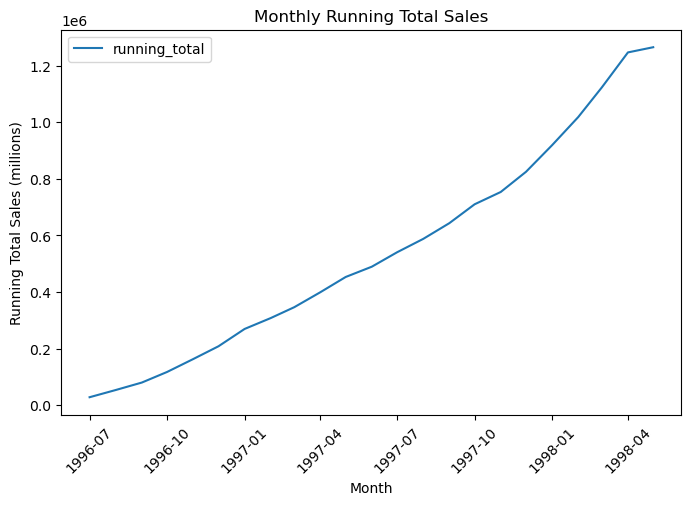

In [15]:
results.plot(x = 'month', y = 'running_total', figsize = (8, 5))
plt.title('Monthly Running Total Sales')
plt.xlabel('Month')
plt.ylabel('Running Total Sales (millions)')
plt.xticks(rotation = 45);

### Month-Over-Month Sales Growth
The management would like to analyze the **month-over-month sales growth rate**. Understanding the **rate at which sales are increasing or decreasing from month to month** will help the management team identify significant trends. We'll need to calculate the **percentage change in sales from one month to the next using the monthly running total**. 

We'll use the `LAG` function to compare **each month's sales with the previous month's**. This can provide a clear picture of the periods of growth or contraction, informing business strategy and decision-making.

In [16]:
conn = connect(config)

query = '''
WITH monthly_sales AS (
    SELECT EXTRACT('month' FROM o.order_date)::int AS month, 
           EXTRACT('year' FROM o.order_date)::int AS year, 
           SUM(od.unit_price * od.quantity * (1 - od.discount)) AS total_sales
    FROM orders o 
    JOIN order_details od ON o.order_id = od.order_id
    GROUP BY EXTRACT('month' FROM o.order_date),  EXTRACT('year' FROM o.order_date)
),

lagged_sales AS (
    SELECT month, 
           year, 
           total_sales, 
           LAG(total_sales) OVER (ORDER BY year, month) AS previous_month_sales
    FROM monthly_sales
)
SELECT year, 
       month,
       ROUND((((total_sales - previous_month_sales) / previous_month_sales) * 100):: numeric, 2) AS growth_rate
FROM lagged_sales;
'''
results = pd.read_sql_query(query, conn)
conn.close()
results.head()

Connected to the PostgreSQL server.


,year,month,growth_rate
0,1996,7,NaN
1,1996,8,-8.53
2,1996,9,3.52
3,1996,10,42.21
4,1996,11,21.55


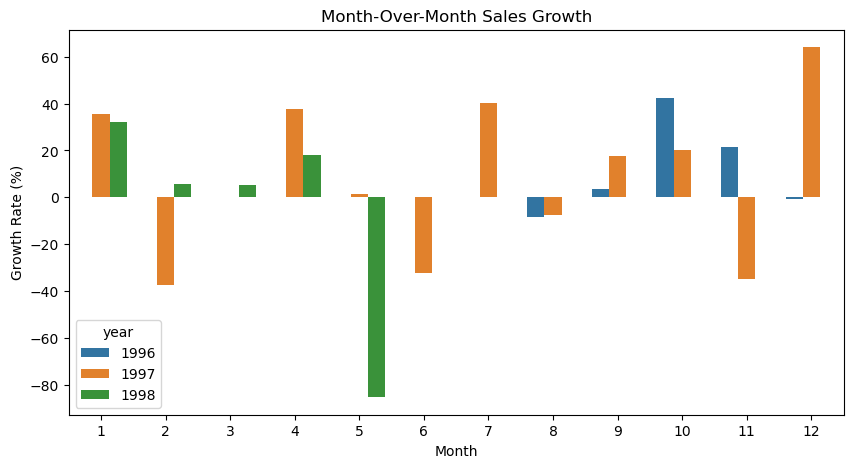

In [17]:
results = results.fillna(0)

plt.figure(figsize = (10, 5))
sns.barplot(x = 'month', y = 'growth_rate', hue = 'year', data = results)
plt.title('Month-Over-Month Sales Growth')
plt.xlabel('Month')
plt.ylabel('Growth Rate (%)');

#### Observations
* `May 1998` saw the worse growth (`-80%`) followed by `Feb, Jun and Nov 1997` 
* Also, `Dec 1997` witnessed the highest growth rate (`>60%`)

### Identifying High-Value Customers
The management would like to identify **high-value customers** to whom they can offer **targeted promotions** and **special offers**, which could drive **increased sales, improve customer retention, and attract new customers**.

These **high-value customers** are customers with **above-average order values**. These customers might be businesses **buying in bulk or individuals** purchasing high-end products.

In [18]:
conn = connect(config)

query = '''
WITH order_values AS (
    SELECT o.customer_id, 
           o.order_id, 
           ROUND(SUM(od.unit_price * od.quantity * (1 - od.discount)):: numeric, 2) AS order_value
    FROM orders o 
    JOIN order_details od ON o.order_id = od.order_id
    GROUP BY o.customer_id, o.order_id
)

SELECT customer_id, 
       order_id, 
       order_value,
       CASE 
           WHEN order_value > AVG(order_value) OVER () THEN 'above average'
           ELSE 'below average'
       END AS value_category
FROM order_values;
'''
results = pd.read_sql_query(query, conn)
conn.close()
results.head()

Connected to the PostgreSQL server.


,customer_id,order_id,order_value,value_category
0,SUPRD,11038,732.60,below average
1,CACTU,10782,12.50,below average
2,FAMIA,10725,287.80,below average
3,GOURL,10423,1020.00,below average
4,TORTU,10518,4150.05,above average


#### Isolate High Value Customers 

In [19]:
high_value_customers = results.loc[results['value_category'] == 'above average', :]
high_value_customers.sort_values(by = 'order_value', ascending = False, inplace = True)
high_value_customers.head(10)

,customer_id,order_id,order_value,value_category
747,QUICK,10865,16387.50,above average
794,HANAR,10981,15810.00,above average
203,SAVEA,11030,12615.05,above average
26,RATTC,10889,11380.00,above average
222,SIMOB,10417,11188.40,above average
609,KOENE,10817,10952.84,above average
334,HUNGO,10897,10835.24,above average
748,RATTC,10479,10495.60,above average
272,QUICK,10540,10191.70,above average
472,QUICK,10691,10164.80,above average


### Percentage of Sales for Each Category
The management team needs an understanding of **sales composition across different product categories**. By knowing the **percentage of total sales for each product category**, they can gain insights into **which categories drive most of the company's sales**. This knowledge will help guide decisions about **inventory (e.g., which categories should be stocked more heavily)** and **marketing strategies (e.g., which categories should be promoted more aggressively)**.

**We will compute the percentage of total sales for each product category**.

In [20]:
conn = connect(config)

query = '''
WITH sales_category AS (
    SELECT c.category_id, c.category_name,
           SUM(p.unit_price * od.quantity * (1 - od.discount)) AS total_sales
    FROM categories c
    JOIN products p ON c.category_id = p.category_id
    JOIN order_details od ON p.product_id = od.product_id
    GROUP BY c.category_id
)

SELECT category_id, 
       category_name,
       ROUND((total_sales / SUM(total_sales) OVER () * 100):: numeric, 2) AS sales_pct
FROM sales_category;
'''
results = pd.read_sql_query(query, conn)
conn.close()
results

Connected to the PostgreSQL server.


,category_id,category_name,sales_pct
0,8,Seafood,10.20
1,7,Produce,7.81
2,1,Beverages,21.33
3,5,Grains/Cereals,7.51
4,2,Condiments,8.40
5,4,Dairy Products,18.56
6,6,Meat/Poultry,12.90
7,3,Confections,13.29


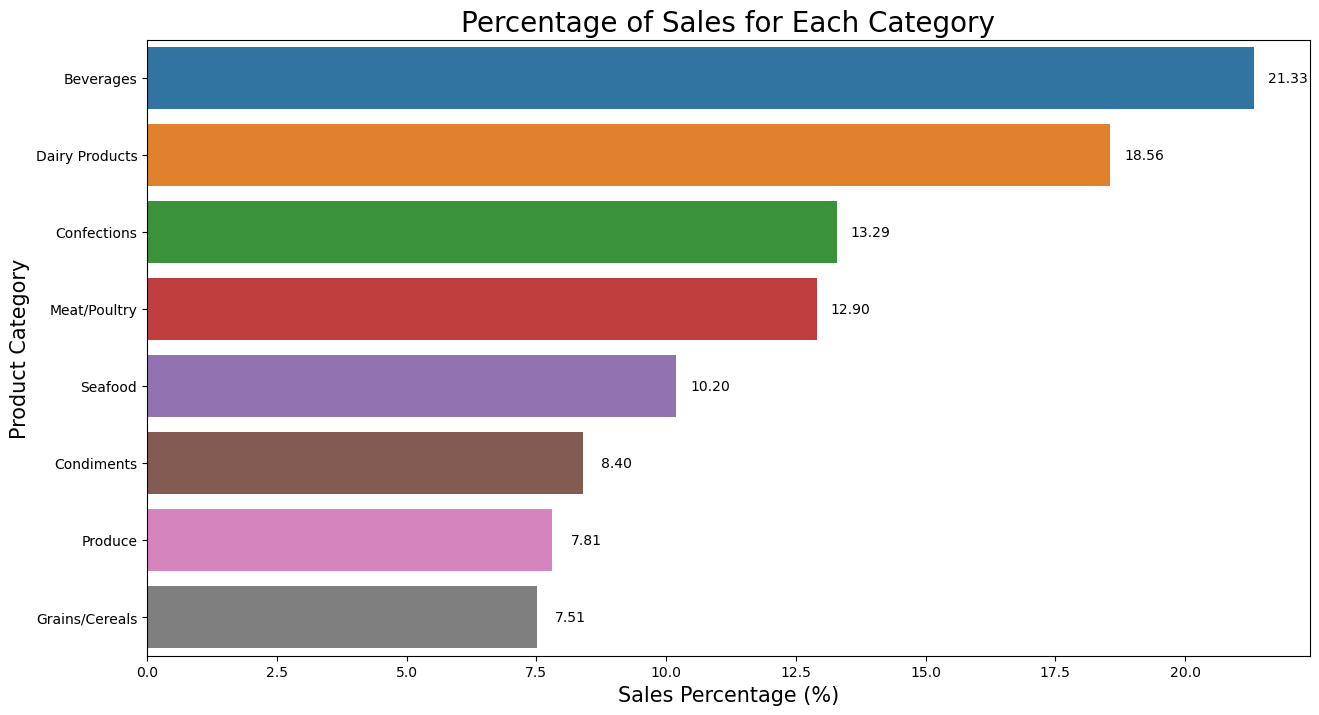

In [21]:
results = results.sort_values(by = 'sales_pct', ascending = False)

plt.figure(figsize = (15, 8))
plots = sns.barplot(x = 'sales_pct', y = 'category_name', data = results)
for bar in plots.patches:
    width = bar.get_width()
    plt.text(0.65 + bar.get_width(), bar.get_y() + 0.5*bar.get_height(),
             f'{width:.2f}', ha = 'center', va = 'center')

plt.title('Percentage of Sales for Each Category', fontsize = 20)
plt.xlabel('Sales Percentage (%)', fontsize = 15)
plt.ylabel('Product Category', fontsize = 15);

The **top 3 categories** that drive most of the company's sales are **beverages, dairy products** and **confections** while the **bottom 3 categories** that are not doing quite well are **condiments, produce** and **grains/cereals**. 

### Top Products Per Category
The management team wants to know the **top three items sold in each product category**. This will allow them to identify **star performers** and ensure that these products are kept in stock and marketed prominently.

We'll have to determine the **total sales for each product**.

In [22]:
conn = connect(config)

query = '''
WITH product_sales AS (
    SELECT p.category_id, 
           p.product_id, 
           p.product_name,
           SUM(p.unit_price * od.quantity * (1 - od.discount)) AS total_sales
    FROM products p
    JOIN order_details od ON p.product_id = od.product_id
    GROUP BY p.category_id, p.product_id
)

SELECT category_id, 
       product_id, 
       product_name,
       ROUND(total_sales:: numeric, 2) AS total_sales
FROM (
    SELECT category_id, 
           product_id, 
           product_name,
           total_sales, 
           ROW_NUMBER() OVER (PARTITION BY category_id ORDER BY total_sales DESC) AS row_num
    FROM product_sales
) AS sq
WHERE row_num <= 3;
'''
results = pd.read_sql_query(query, conn)
conn.close()
results

Connected to the PostgreSQL server.


,category_id,product_id,product_name,total_sales
0,1,38,Côte de Blaye,153897.17
1,1,43,Ipoh Coffee,25109.10
2,1,2,Chang,17719.40
3,2,63,Vegie-spread,18343.62
4,2,61,Sirop d'érable,15022.35
5,2,65,Louisiana Fiery Hot Pepper Sauce,14893.93
6,3,62,Tarte au sucre,50737.09
7,3,20,Sir Rodney's Marmalade,24199.56
8,3,26,Gumbär Gummibärchen,21662.69
9,4,59,Raclette Courdavault,76683.75
